# ToDo:
- think about other cluster methods (single linkage...)
- only use healthy (prmdiag=0) and sick (2,3) people -> clearer results?
- (If the clustering approach should be continued) put everything in a function, input parameters: number of clusters, cluster method, which observations should be used. The function should fit the clustering and produce some plots to evaluate the results

# Import Libraries and setup

In [42]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


plt.style.use("ggplot")

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/Colab Notebooks/data_DELCODE')

Mounted at /content/drive


# Load and transform data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
train.head()


,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,...,237_243,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,85,3fd91223d,14,63,18.05.2016,1,0,13,1.215577,1.0,85.0,0.749860,0.230923,-0.065474,0.412777,0.303270,0.341117,-0.027277,0.574057,0.290517,0.862302,0.479994,0.419541,0.089797,0.211377,-0.069165,0.243698,0.138934,0.203588,-0.128424,-0.142274,-0.097212,0.342343,-0.006937,0.953543,0.271842,-0.215807,-0.345942,0.288377,-0.002376,...,0.675390,0.641759,0.256006,0.161096,0.051992,0.335806,0.274249,0.464632,0.346927,0.197321,0.093035,0.169661,0.843718,0.758413,0.297913,0.398200,-0.033476,1.027731,1.040865,1.111977,0.796641,0.750172,0.242670,0.693493,0.663318,0.677533,0.545846,0.246136,0.600611,0.532708,0.910899,0.423027,0.168445,0.086235,0.553605,0.260301,0.262766,-0.064755,-0.121692,1.193451
1,11,0f1b4b7ac,11,68,26.10.2017,1,2,13,-0.583224,1.0,11.0,0.769255,0.488714,0.116482,-0.021402,-0.150269,0.307751,0.393959,0.304850,0.355440,0.476269,0.125607,-0.130721,-0.072421,0.430517,0.186178,0.727480,0.388229,0.120676,0.009006,0.496298,0.096529,0.357324,0.193164,0.485271,0.248289,-0.113434,-0.227484,0.485454,0.268980,...,1.170770,0.347485,0.377663,0.224154,0.323828,0.439175,0.538379,0.322498,0.745291,0.248104,0.554985,0.353254,0.220629,0.451341,0.322443,0.568902,0.357294,0.450699,0.659226,0.461063,0.722502,0.556016,0.228903,0.295915,0.322317,0.484691,0.791189,0.268268,0.141795,0.034816,0.381080,0.852528,0.141102,0.182648,0.196211,0.387882,0.299217,0.194711,0.191894,1.018621
2,619,bf5da3838,11,78,22.06.2016,0,1,14,-0.856116,1.0,619.0,0.168419,0.257018,0.016907,0.091702,-0.010532,0.435234,0.106881,0.182423,0.056001,0.502006,0.317397,0.217119,0.021138,0.640308,0.071841,0.204547,0.161851,0.247751,-0.140406,0.114880,-0.060171,0.269094,0.016566,0.430953,0.037941,0.160389,-0.093853,0.430277,-0.035102,...,0.709562,0.446627,0.172218,-0.172940,0.199733,0.216898,0.212193,0.245178,0.138725,0.192206,0.234587,0.136768,0.221140,0.219693,0.082570,0.190661,0.110283,0.411547,0.318120,0.673747,0.659346,0.442534,0.396549,0.123856,0.012965,0.577570,0.563080,0.140217,0.097882,-0.028234,0.639703,0.427146,0.088723,-0.245473,0.663036,0.142216,-0.300101,0.115183,-0.298258,0.131574
3,252,47e5a2600,2,63,28.11.2016,1,1,17,0.862633,0.0,252.0,0.868713,0.325486,0.395653,0.391204,0.349502,0.079478,0.199210,0.158742,-0.060597,0.801271,0.418965,0.180624,0.031938,0.310969,0.231340,0.663267,0.339705,0.427437,0.265302,0.042056,0.125814,0.487544,0.190261,0.516608,0.238371,0.118187,0.057087,0.064976,0.018432,...,0.695289,0.720458,0.383823,0.223196,0.268081,0.140685,0.303392,0.211814,0.215745,0.049197,0.347162,0.521063,0.218042,0.429776,0.175440,0.284785,-0.061578,0.478259,0.531669,0.544807,0.729218,0.118570,-0.128986,0.300403,0.406977,0.579221,0.414116,0.185960,0.494446,0.406204,0.331876,0.222091,0.354670,0.261393,0.797265,0.431262,0.195765,0.176242,-0.108549,0.525855
4,872,48387a07e,8,79,2015-08-31,1,3,11,-2.116266,1.0,872.0,0.128000,0.545008,-0.343972,0.862140,-0.015617,0.179164,-0.233017,0.034938,-0.105519,0.733050,0.088092,0.277305,-0.179329,0.332651,-0.231090,0.702441,-0.072943,0.645076,-0.215037,0.274248,-0.451468,0.574711,-0.173056,0.595247,-0.396143,0.378200,-0.196846,0.674376,-0.166660,...,0.301599,0.281604,-0.257081,0.164976,-0.064623,0.205962,0.259190,0.369864,0.119939,0.430113,-0.128200,0.036388,-0.062767,0.013018,0.002274,0.071944,0.069917,0.173637,0.107760,0.456734,0.444816,0.072618,0.086900,-0.095910,0.172357,0.220310,0.484933,0.004595,-0.263606,-0.013920,0.155383,0.416782,-0.300804,0.057657,0.031142,-0.086161,0.055487,-0.082463,-0.0298

In [4]:
test.head()

,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,...,237_243,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,868,6829e1ce3,10,71,2015-01-26,2,3,16,-1.729994,1.0,868.0,1.146729,0.522587,0.299638,0.549717,0.073312,0.446971,0.012572,0.603935,0.515467,0.932092,0.583021,0.171392,-0.144495,-0.024442,-0.154272,0.712633,0.251251,0.240397,-0.052765,0.386807,0.228755,0.298525,0.221253,1.410941,0.474349,0.086748,0.237207,0.782228,0.296881,...,0.351774,0.511471,0.285011,0.270964,0.300079,0.243370,0.258913,0.261387,0.046223,0.189416,0.380844,0.385093,0.527842,0.512310,0.552118,0.450334,0.314042,0.155607,0.164104,0.277321,0.763092,0.408995,0.353857,-0.039462,-0.050630,0.585805,0.494930,0.147964,0.142526,-0.063525,0.747366,0.400368,-0.087084,-0.167530,0.879731,-0.252925,-0.231639,-0.138693,-0.027045,0.388247
1,441,8522b0508,2,67,21.10.2014,1,0,16,1.158892,1.0,441.0,0.199663,0.610013,-0.066466,0.349376,0.076821,0.208840,-0.262101,0.251783,0.211163,0.502968,0.207629,0.394165,0.220473,0.123993,-0.243632,0.552812,0.049304,-0.000104,-0.295398,-0.166069,-0.178240,0.405269,0.093878,0.658632,-0.157273,-0.017449,-0.041605,0.469527,-0.155139,...,0.568286,0.587661,0.183287,0.223735,0.130710,0.166708,0.359447,0.452511,0.340619,0.426335,0.069407,0.105798,0.426328,0.282587,0.205381,0.334163,-0.105860,0.547087,0.732076,0.466669,0.774426,0.387074,0.279595,0.339490,0.642812,0.525380,0.845305,0.514832,0.259368,0.347379,0.496284,0.486426,0.242803,0.254150,0.619526,0.272887,0.358726,0.032463,0.061394,0.616225
2,344,278d3e09d,8,65,11.09.2017,0,2,13,-0.551006,1.0,344.0,0.725238,0.426898,0.360894,0.397894,0.256171,0.386240,0.287945,0.371946,0.271444,0.609089,0.498072,0.465709,0.396935,0.336638,0.446888,0.531004,0.389180,0.377135,0.363941,0.571994,0.364167,0.417144,0.246004,0.516343,0.338453,0.069048,0.216679,0.159632,0.384338,...,0.155720,0.567304,-0.004329,0.017256,0.063996,0.074868,0.256378,0.301886,0.180127,0.111256,-0.155415,-0.101298,0.141372,0.379444,-0.019284,0.072540,-0.186382,0.199278,0.417957,0.093033,0.441952,0.149979,0.208389,0.309599,0.440471,0.292920,0.381183,-0.173404,-0.034664,-0.018565,0.623140,0.499137,0.129084,0.047080,0.387393,-0.007641,0.035944,0.172719,0.116450,0.835336
3,739,e082ef075,10,73,19.10.2017,0,1,15,0.065046,0.0,739.0,0.869575,0.559593,0.257733,0.073006,0.082113,0.381939,0.371169,0.294993,0.386934,0.532553,0.449445,-0.205010,-0.239771,0.455469,0.453030,0.448847,0.264279,0.055732,0.076631,0.338998,0.139095,0.570759,0.290608,0.591161,0.232670,-0.378361,-0.021351,-0.019480,0.040730,...,0.739715,0.696475,0.096738,0.061929,0.030234,0.570444,0.710507,0.727654,0.669247,0.624993,0.029718,0.028448,0.388798,0.331263,0.181484,0.231469,-0.077557,0.505848,0.542434,0.554592,0.730163,0.717702,0.451304,0.104766,0.353524,0.938313,0.585477,0.233315,-0.033772,0.010233,0.736154,0.569162,-0.119822,-0.006025,0.557559,-0.116897,-0.013115,0.108947,0.054055,0.560809
4,788,f71815317,10,68,23.03.2015,1,0,18,0.746486,1.0,788.0,0.441515,0.386490,-0.026574,0.261981,0.058682,0.529303,0.489445,0.249773,0.230496,0.483261,0.222630,0.437510,0.109644,0.056770,-0.024151,0.468324,-0.045324,0.228089,0.026241,0.296034,0.027189,0.339351,0.031207,0.528243,0.138107,0.161225,-0.218060,0.422676,-0.077393,...,0.519957,0.316054,0.159369,0.163482,0.217169,0.311668,0.339225,0.221511,0.103218,0.326568,0.152667,0.141363,0.100861,0.176335,0.059848,0.209259,0.286097,0.011010,0.112836,0.234297,0.524877,0.097849,0.190229,0.045144,0.150050,-0.070643,0.338269,0.071217,-0.283862,-0.029804,0.250007,0.286963,0.099830,0.150341,0.217731,-0.076833,0.167448,0.222248,0.2066

In [5]:
data = pd.concat([train, test])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 181
Columns: 30146 entries, ConnID to 245_246
dtypes: float64(30138), int64(6), object(2)
memory usage: 209.1+ MB


In [6]:
data.drop(['ConnID','Repseudonym','siteid','age', 'visdat', 'sex', 'prmdiag', 'edyears', 'MEM_score', 'Apoe', 'IDs'], axis = 1, inplace=True)
data.head()

,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,1_31,1_32,1_33,1_34,1_35,1_36,1_37,1_38,1_39,1_40,1_41,...,237_243,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,0.749860,0.230923,-0.065474,0.412777,0.303270,0.341117,-0.027277,0.574057,0.290517,0.862302,0.479994,0.419541,0.089797,0.211377,-0.069165,0.243698,0.138934,0.203588,-0.128424,-0.142274,-0.097212,0.342343,-0.006937,0.953543,0.271842,-0.215807,-0.345942,0.288377,-0.002376,0.105462,0.011338,0.225393,0.253414,0.241490,0.170374,0.454263,0.390002,0.608381,0.330585,0.297279,...,0.675390,0.641759,0.256006,0.161096,0.051992,0.335806,0.274249,0.464632,0.346927,0.197321,0.093035,0.169661,0.843718,0.758413,0.297913,0.398200,-0.033476,1.027731,1.040865,1.111977,0.796641,0.750172,0.242670,0.693493,0.663318,0.677533,0.545846,0.246136,0.600611,0.532708,0.910899,0.423027,0.168445,0.086235,0.553605,0.260301,0.262766,-0.064755,-0.121692,1.193451
1,0.769255,0.488714,0.116482,-0.021402,-0.150269,0.307751,0.393959,0.304850,0.355440,0.476269,0.125607,-0.130721,-0.072421,0.430517,0.186178,0.727480,0.388229,0.120676,0.009006,0.496298,0.096529,0.357324,0.193164,0.485271,0.248289,-0.113434,-0.227484,0.485454,0.268980,0.308087,0.194488,0.309779,0.124812,0.151790,-0.065100,0.646630,0.305655,0.520542,0.225370,0.040498,...,1.170770,0.347485,0.377663,0.224154,0.323828,0.439175,0.538379,0.322498,0.745291,0.248104,0.554985,0.353254,0.220629,0.451341,0.322443,0.568902,0.357294,0.450699,0.659226,0.461063,0.722502,0.556016,0.228903,0.295915,0.322317,0.484691,0.791189,0.268268,0.141795,0.034816,0.381080,0.852528,0.141102,0.182648,0.196211,0.387882,0.299217,0.194711,0.191894,1.018621
2,0.168419,0.257018,0.016907,0.091702,-0.010532,0.435234,0.106881,0.182423,0.056001,0.502006,0.317397,0.217119,0.021138,0.640308,0.071841,0.204547,0.161851,0.247751,-0.140406,0.114880,-0.060171,0.269094,0.016566,0.430953,0.037941,0.160389,-0.093853,0.430277,-0.035102,-0.029993,0.202016,0.099901,0.057707,0.136433,0.135859,0.613484,0.007812,0.598032,0.056181,0.126008,...,0.709562,0.446627,0.172218,-0.172940,0.199733,0.216898,0.212193,0.245178,0.138725,0.192206,0.234587,0.136768,0.221140,0.219693,0.082570,0.190661,0.110283,0.411547,0.318120,0.673747,0.659346,0.442534,0.396549,0.123856,0.012965,0.577570,0.563080,0.140217,0.097882,-0.028234,0.639703,0.427146,0.088723,-0.245473,0.663036,0.142216,-0.300101,0.115183,-0.298258,0.131574
3,0.868713,0.325486,0.395653,0.391204,0.349502,0.079478,0.199210,0.158742,-0.060597,0.801271,0.418965,0.180624,0.031938,0.310969,0.231340,0.663267,0.339705,0.427437,0.265302,0.042056,0.125814,0.487544,0.190261,0.516608,0.238371,0.118187,0.057087,0.064976,0.018432,-0.057417,0.038900,0.577939,0.531050,0.419170,0.031777,0.614033,0.272392,0.321683,0.150160,-0.095889,...,0.695289,0.720458,0.383823,0.223196,0.268081,0.140685,0.303392,0.211814,0.215745,0.049197,0.347162,0.521063,0.218042,0.429776,0.175440,0.284785,-0.061578,0.478259,0.531669,0.544807,0.729218,0.118570,-0.128986,0.300403,0.406977,0.579221,0.414116,0.185960,0.494446,0.406204,0.331876,0.222091,0.354670,0.261393,0.797265,0.431262,0.195765,0.176242,-0.108549,0.525855
4,0.128000,0.545008,-0.343972,0.862140,-0.015617,0.179164,-0.233017,0.034938,-0.105519,0.733050,0.088092,0.277305,-0.179329,0.332651,-0.231090,0.702441,-0.072943,0.645076,-0.215037,0.274248,-0.451468,0.574711,-0.173056,0.595247,-0.396143,0.378200,-0.196846,0.674376,-0.166660,0.612536,-0.324272,0.939128,-0.014797,0.828764,-0.181847,0.353251,-0.151077,0.833930,-0.089481,-0.079434,...,0.301599,0.281604,-0.257081,0.164976,-0.064623,0.205962,0.259190,0.369864,0.119939,0.430113,-0.128200,0.036388,-0.062767,0.013018,0.002274,0.071944,0.069917,

# Clustering - Hierarchical, ward

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

In [7]:
cl_w = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward', compute_distances=True)
cl_w.fit(data)

AgglomerativeClustering(compute_distances=True, n_clusters=8)

In [8]:
cl_w.n_clusters

8

In [9]:
cl_w.labels_[:15]

array([7, 5, 6, 5, 6, 5, 3, 6, 3, 6, 5, 6, 5, 7, 3])

In [10]:
labels = pd.Series(cl_w.labels_)
labels.value_counts()

5    248
6    238
3    147
1    137
0     90
7     42
2      6
4      1
dtype: int64

In [11]:
cl_w.children_[:20]

array([[ 67, 409],
       [419, 590],
       [464, 909],
       [259, 368],
       [691, 799],
       [292, 411],
       [133, 574],
       [204, 731],
       [390, 904],
       [427, 680],
       [ 57, 379],
       [695, 831],
       [ 18, 397],
       [568, 696],
       [200, 911],
       [ 92, 650],
       [439, 779],
       [ 87, 218],
       [184, 787],
       [ 73, 910]])

In [12]:
cl_w.distances_[:20]

array([32.53361182, 37.32190911, 37.5798199 , 37.86144487, 38.06242394,
       38.31364402, 38.35446674, 38.42264219, 38.44823805, 38.52975892,
       38.66177327, 38.66474006, 38.91594721, 38.98358319, 38.99012434,
       38.99601655, 38.99700178, 39.02121529, 39.05286747, 39.08636685])

In [13]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

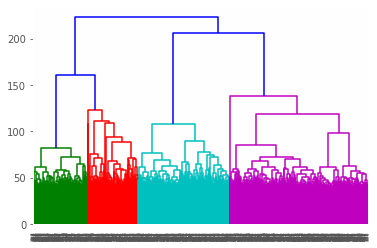

In [14]:
plot_dendrogram(cl_w)

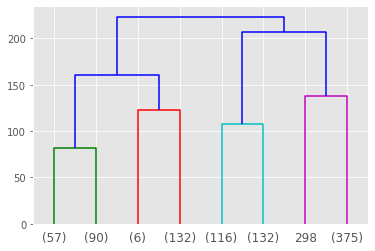

In [15]:
plot_dendrogram(cl_w, truncate_mode = "level", p = 2)

In [16]:
cl_w5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward', compute_distances=True)
cl_w5.fit(data)


AgglomerativeClustering(compute_distances=True, n_clusters=5)

In [17]:
labels_w5 = pd.Series(cl_w5.labels_)
labels_w5.value_counts()

1    375
2    248
3    147
0    138
4      1
dtype: int64

In [18]:
cl_w4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward', compute_distances=True)
cl_w4.fit(data)

AgglomerativeClustering(compute_distances=True, n_clusters=4)

In [19]:
labels_w4 = pd.Series(cl_w4.labels_)
labels_w4.value_counts()

0    376
2    248
3    147
1    138
dtype: int64

# Clustering - KMeans

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

In [20]:
cl_km = KMeans(n_clusters=4)
cl_km.fit(data)

KMeans(n_clusters=4)

In [21]:
cl_km.inertia_

1045480.4258848787

In [22]:
cl_km.labels_[:20]

array([0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 3, 2, 1, 1],
      dtype=int32)

In [23]:
labelsKM = pd.Series(cl_km.labels_)
labelsKM.value_counts()

1    354
2    265
0    161
3    129
dtype: int64

# Exploration

In [24]:
data2 = pd.concat([train, test])
data2['ward4'] = cl_w4.labels_
data2['KM4'] = cl_km.labels_

In [25]:
pd.crosstab(index=data2['KM4'], columns='count')

col_0,count
KM4,
0,161
1,354
2,265
3,129


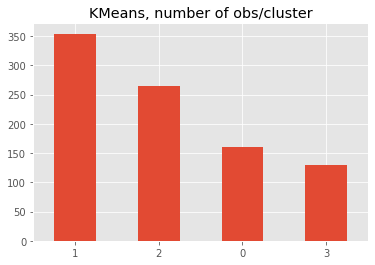

In [26]:
data2['KM4'].value_counts().plot.bar(rot = 0, title = 'KMeans, number of obs/cluster')

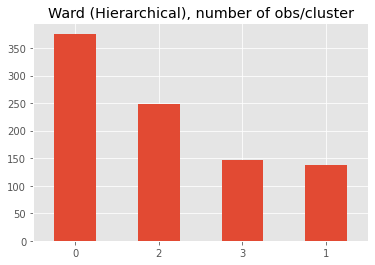

In [27]:
data2['ward4'].value_counts().plot.bar(rot = 0, title = 'Ward (Hierarchical), number of obs/cluster')

In [28]:
pd.crosstab(index=data2['KM4'], columns=data2['prmdiag'])

prmdiag,0,1,2,3,4
KM4,,,,,
0,25,79,28,19,10
1,108,133,43,39,31
2,66,108,48,15,28
3,19,44,36,24,6


In [29]:
pd.crosstab(index=data2['ward4'], columns=data2['prmdiag'])

prmdiag,0,1,2,3,4
ward4,,,,,
0,119,134,47,47,29
1,26,53,38,17,4
2,56,103,41,17,31
3,17,74,29,16,11


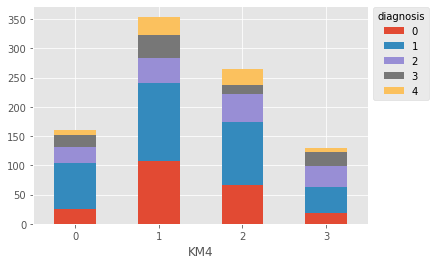

In [30]:
plot = pd.crosstab(index=data2['KM4'], columns=data2['prmdiag']).plot(kind = 'bar', stacked = True, rot = 0)
plot.legend(title = 'diagnosis', bbox_to_anchor=(1, 1.02), loc='upper left')

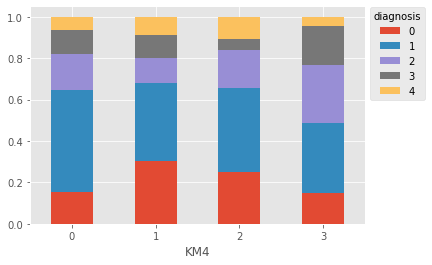

In [31]:
plot = pd.crosstab(index=data2['KM4'], columns=data2['prmdiag'], normalize = 'index').plot(kind = 'bar', stacked = True, rot = 0)
plot.legend(title = 'diagnosis', bbox_to_anchor=(1, 1.02), loc='upper left')

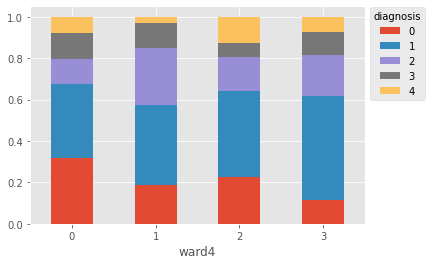

In [32]:
plot = pd.crosstab(index=data2['ward4'], columns=data2['prmdiag'], normalize = 'index').plot(kind = 'bar', stacked = True, rot = 0)
plot.legend(title = 'diagnosis', bbox_to_anchor=(1, 1.02), loc='upper left')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


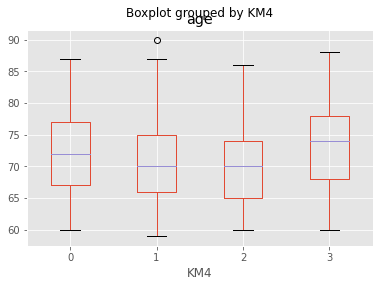

In [33]:
data2.boxplot(column='age',by='KM4')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


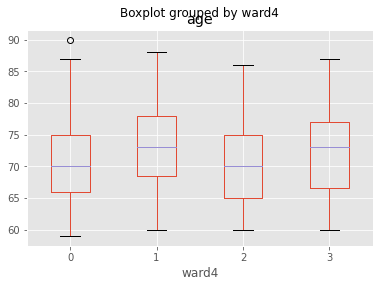

In [34]:
data2.boxplot(column='age',by='ward4')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


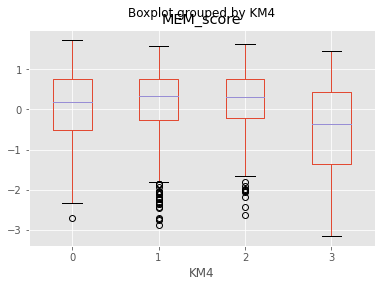

In [35]:
data2.boxplot(column='MEM_score',by='KM4')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


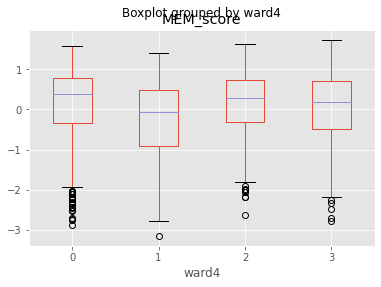

In [36]:
data2.boxplot(column='MEM_score',by='ward4')

# PCA

In [39]:
pca_100 = PCA(n_components=100, random_state=123) # random state: reproducible results if randomization is used
pca_100.fit(data)
dat_pca = pca_100.transform(data)
dat_pca.shape

(909, 100)

[0.04019212 0.03665724 0.02653439 0.01893469 0.01355545 0.01165155
 0.01123989 0.01079201 0.0088242  0.00870627 0.00853092 0.00828287
 0.00725667 0.00709671 0.00686457 0.00656483 0.00611605 0.00587594
 0.00583618 0.00563098 0.00534348 0.00529056 0.00505693 0.00501516
 0.00492704 0.00455451 0.00442441 0.00440546 0.00433611 0.00418835
 0.00406545 0.00399292 0.00393117 0.00380867 0.00373579 0.00362431
 0.00360141 0.00356422 0.00349423 0.00342938 0.00331614 0.00326646
 0.00315496 0.00312176 0.00305466 0.00303564 0.00293045 0.0028884
 0.00286825 0.00282306 0.00278873 0.00269519 0.00268873 0.00267268
 0.00264494 0.00258103 0.00253542 0.00249754 0.0024925  0.00246628
 0.00242295 0.00239958 0.00236444 0.00232815 0.00229423 0.00227716
 0.00223949 0.00222707 0.00219902 0.00216928 0.00214477 0.00212765
 0.00211945 0.00206938 0.00203598 0.00203516 0.00199868 0.00197172
 0.00195976 0.00194542 0.00193584 0.00190925 0.00187969 0.00186578
 0.00185774 0.00181798 0.0018101  0.00179774 0.00178    0.00175

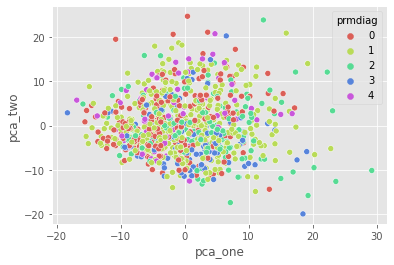

In [47]:
print(pca_100.explained_variance_ratio_)

data2['pca_one'] = dat_pca[:, 0]
data2['pca_two'] = dat_pca[:, 1]

sns.scatterplot(
    x = "pca_one", y = "pca_two",
    hue = "prmdiag",
    data = data2,
    palette=sns.color_palette("hls", 5)
)


# t-SNE
On PCA results

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
("It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.")

In [48]:
tsne2 = TSNE(n_components=2, perplexity=100)
tsne2_results = tsne2.fit_transform(dat_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(909, 2)


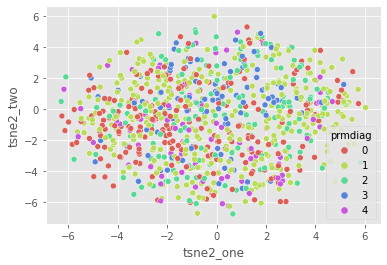

In [50]:
print(tsne2_results.shape)
data2['tsne2_one'] = tsne2_results[:, 0]
data2['tsne2_two'] = tsne2_results[:, 1]

sns.scatterplot(
    x = "tsne2_one", y = "tsne2_two",
    hue = "prmdiag",
    data = data2,
    palette=sns.color_palette("hls", 5)
)